# Relatorio Automatizado Bolsa de Valores
### Desafio:

* Automação de um relatório de fechamento de mercado com o Python através da coleta de cotações históricas do Ibovespa e Dólar e do envio diário através de uma ferramenta de e-mail automaticamente.  

### Passo a passo:

*   **Passo 1** - Instalar e importar os módulos e bibliotecas.
   
   
*   **Passo 2** - Pegar as cotações históricas.
   
   
*   **Passo 3** - Tratar dados coletados.
   
   
*   **Passo 4** - Criar gráficos de performance.
   
   
*   **Passo 5** - Calcular retornos diários.
   
   
*   **Passo 6** - Configurar e enviar o e-mail.

-------------------

# Passo 1 - Instalar e importar os módulos e bibliotecas.

In [1]:
!pip install mplcyberpunk


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\bispo\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
!pip install yfinance


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\bispo\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [3]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import mplcyberpunk

# Passo 2 - Pegar as cotações históricas

In [4]:
tickers = ["^BVSP", "^GSPC", "BRL=X"]

In [5]:
dados_mercado = yf.download(tickers, period = "5y")

dados_mercado = dados_mercado["Adj Close"]

dados_mercado

[*********************100%***********************]  3 of 3 completed


Ticker,BRL=X,^BVSP,^GSPC
Date,,,
2019-09-17 00:00:00+00:00,NaN,104617.0,NaN
2019-09-18 00:00:00+00:00,4.07600,104532.0,3006.729980
2019-09-19 00:00:00+00:00,4.10730,104339.0,3006.790039
2019-09-20 00:00:00+00:00,4.16660,104817.0,2992.070068
2019-09-23 00:00:00+00:00,4.14830,104638.0,2991.780029
...,...,...,...
2024-09-12 00:00:00+00:00,5.66740,134029.0,5595.759766
2024-09-13 00:00:00+00:00,5.62570,134882.0,5626.020020
2024-09-16 00:00:00+00:00,5.61237,135118.0,5633.089844


# Passo 3 - Tratar dados coletados.

In [6]:
dados_mercado = dados_mercado.dropna()

dados_mercado

Ticker,BRL=X,^BVSP,^GSPC
Date,,,
2019-09-18 00:00:00+00:00,4.07600,104532.0,3006.729980
2019-09-19 00:00:00+00:00,4.10730,104339.0,3006.790039
2019-09-20 00:00:00+00:00,4.16660,104817.0,2992.070068
2019-09-23 00:00:00+00:00,4.14830,104638.0,2991.780029
2019-09-24 00:00:00+00:00,4.16150,103876.0,2966.600098
...,...,...,...
2024-09-11 00:00:00+00:00,5.66290,134677.0,5554.129883
2024-09-12 00:00:00+00:00,5.66740,134029.0,5595.759766
2024-09-13 00:00:00+00:00,5.62570,134882.0,5626.020020


In [7]:
dados_mercado.columns = ["DOLAR", "IBOVESPA", "S&P500"]

dados_mercado

,DOLAR,IBOVESPA,S&P500
Date,,,
2019-09-18 00:00:00+00:00,4.07600,104532.0,3006.729980
2019-09-19 00:00:00+00:00,4.10730,104339.0,3006.790039
2019-09-20 00:00:00+00:00,4.16660,104817.0,2992.070068
2019-09-23 00:00:00+00:00,4.14830,104638.0,2991.780029
2019-09-24 00:00:00+00:00,4.16150,103876.0,2966.600098
...,...,...,...
2024-09-11 00:00:00+00:00,5.66290,134677.0,5554.129883
2024-09-12 00:00:00+00:00,5.66740,134029.0,5595.759766
2024-09-13 00:00:00+00:00,5.62570,134882.0,5626.020020


# Passo 4 - Criar gráficos de performance.

In [8]:
plt.style.use("cyberpunk")

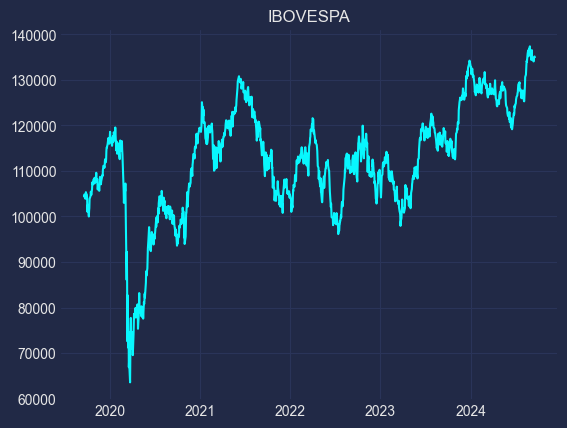

In [9]:
plt.plot(dados_mercado["IBOVESPA"])
plt.title("IBOVESPA")

plt.savefig("ibovespa.png")

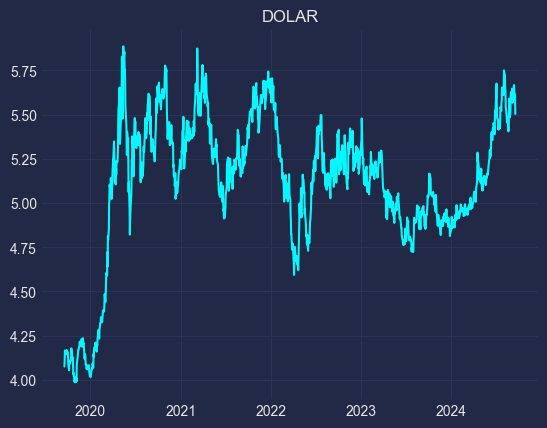

In [10]:
plt.plot(dados_mercado["DOLAR"])
plt.title("DOLAR")

plt.savefig("dolar.png")

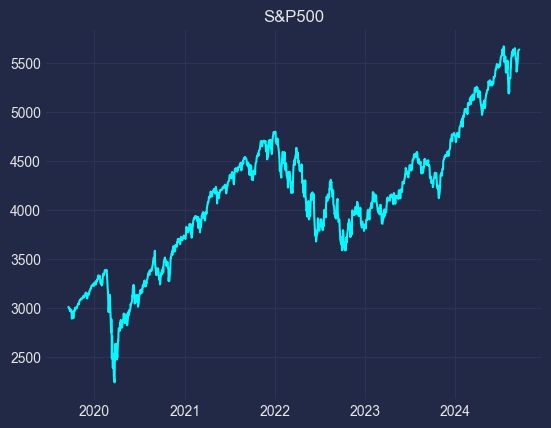

In [11]:
plt.plot(dados_mercado["S&P500"])
plt.title("S&P500")

plt.savefig("sp500.png")

# Passo 5 - Calcular retornos diários.

In [12]:
retornos_diarios = dados_mercado.pct_change()

retornos_diarios

,DOLAR,IBOVESPA,S&P500
Date,,,
2019-09-18 00:00:00+00:00,NaN,NaN,NaN
2019-09-19 00:00:00+00:00,0.007679,-0.001846,0.000020
2019-09-20 00:00:00+00:00,0.014438,0.004581,-0.004896
2019-09-23 00:00:00+00:00,-0.004392,-0.001708,-0.000097
2019-09-24 00:00:00+00:00,0.003182,-0.007282,-0.008416
...,...,...,...
2024-09-11 00:00:00+00:00,0.014075,0.002658,0.010665
2024-09-12 00:00:00+00:00,0.000795,-0.004812,0.007495
2024-09-13 00:00:00+00:00,-0.007358,0.006364,0.005408


In [13]:
retornos_diarios["DOLAR"].iloc[-3]

np.float64(-0.007357851427621354)

In [14]:
retorno_dolar = retornos_diarios["DOLAR"].iloc[-1]
retorno_ibovespa = retornos_diarios["IBOVESPA"].iloc[-1]
retorno_sp = retornos_diarios["S&P500"].iloc[-1]

In [15]:
retorno_dolar = str(round(retorno_dolar * 100, 2)) + "%"

retorno_dolar

'-1.93%'

In [16]:
retorno_ibovespa = str(round(retorno_ibovespa * 100, 2)) + "%"
retorno_sp = str(round(retorno_sp * 100, 2)) + "%"

retorno_sp

'0.03%'

In [17]:
retorno_ibovespa

'-0.12%'

# Passo 6 - Configurar e enviar o e-mail


In [18]:
!pip install pywin32


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\bispo\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [19]:
import win32com.client as win32

In [20]:
outlook = win32.Dispatch("outlook.application") 

email = outlook.CreateItem(0)

In [21]:
email.To = "joaoharv@gmail.com"
email.Subject = "Relatório de Mercado"
email.Body = f'''Prezado diretor, segue o relatório de mercado:

* O Ibovespa teve o retorno de {retorno_ibovespa}.
* O Dólar teve o retorno de {retorno_dolar}.
* O S&P500 teve o retorno de {retorno_sp}.

Segue em anexo a peformance dos ativos nos últimos 6 meses.

Att,
Melhor estagiário do mundo


'''

anexo_ibovespa = r"C:\ANALISTA_DADOS\GitHub\Projects\Bolsa_de_Valores\ibovespa.png"
anexo_dolar = r"C:\ANALISTA_DADOS\GitHub\Projects\Bolsa_de_Valores\dolar.png"
anexo_sp = r"C:\ANALISTA_DADOS\GitHub\Projects\Bolsa_de_Valores\sp500.png"

email.Attachments.Add(anexo_ibovespa)
email.Attachments.Add(anexo_dolar)
email.Attachments.Add(anexo_sp)

email.Send()
